Shape of xTrain array (138, 60)
Shape of yTrain array (138,)
Shape of xTest array (70, 60)
Shape of yTest array (70,)
Some values predicted by model [-0.10240253  0.42090698  0.38593034  0.36094537  0.31520494] [ 1.11094176  1.12242751  0.77626699  1.02016858  0.66338081]
tp = 68.0	fn = 6.0
fp = 7.0	tn = 57.0

tp = 28.0	fn = 9.0
fp = 9.0	tn = 24.0

AUC for in-sample ROC curve: 0.979519


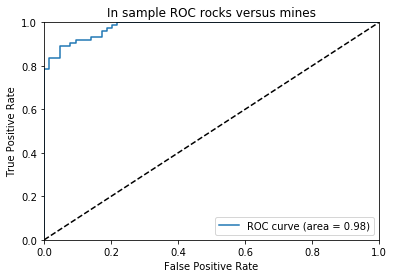

AUC for out-of-sample ROC curve: 0.848485


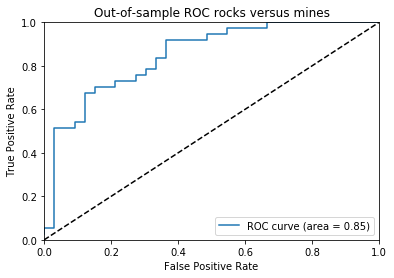

In [4]:
#use scikit learn package to build classified on rocks-versus-mines data
#assess classifier performance

from urllib.request import urlopen
import numpy
import random
from sklearn import datasets, linear_model
from sklearn.metrics import roc_curve, auc
import pylab as pl

def confusionMatrix(predicted, actual, threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i] > 0.5: #labels that are 1.0  (positive examples)
            if predicted[i] > threshold:
                tp += 1.0 #correctly predicted positive
            else:
                fn += 1.0 #incorrectly predicted negative
        else:             #labels that are 0.0 (negative examples)
            if predicted[i] < threshold:
                tn += 1.0 #correctly predicted negative
            else:
                fp += 1.0 #incorrectly predicted positive
                
    rtn = [tp, fn, fp, tn]
    return rtn

#read in the rocks versus mines data set from uci.edu data repository
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data")
data = urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
labels = []
for line in data:
    #split on comma
    line = line.decode()
    row = line.strip().split(",")
    #assign label 1.0 for "M" and 0.0 for "R"
    if(row[-1] == 'M'):
        labels.append(1.0)
    else:
        labels.append(0.0)
    #remove lable from row
    row.pop()
    #convert row to floats
    floatRow = [float(num) for num in row]
    xList.append(floatRow)
    
#divide attribute matrix and label vector into training(2/3 of data)
#and test sets (1/3 of data)
indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]

#form list of list input into numpy arrays to match input class
#for scikit-learn linear model
xTrain = numpy.array(xListTrain); yTrain = numpy.array(labelsTrain)
xTest = numpy.array(xListTest); yTest = numpy.array(labelsTest)

#check shapes to see what they look like
print("Shape of xTrain array", xTrain.shape)
print("Shape of yTrain array", yTrain.shape)
print("Shape of xTest array", xTest.shape)
print("Shape of yTest array", yTest.shape)

#train linear regression model
rocksVMinesModel = linear_model.LinearRegression()
rocksVMinesModel.fit(xTrain,yTrain)

#generate predictions on in-sample error
trainingPredictions = rocksVMinesModel.predict(xTrain)
print("Some values predicted by model", trainingPredictions[0:5], trainingPredictions[-6:-1])

#generate confusion matrix for predictions on training set (in-sample
confusionMatTrain = confusionMatrix(trainingPredictions, yTrain, 0.5)
#pick threshold value and generate confusion matrix entries
tp = confusionMatTrain[0]; fn = confusionMatTrain[1]
fp = confusionMatTrain[2]; tn = confusionMatTrain[3]

print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " + str(fp) + "\ttn = " + str(tn) + '\n')

#generate predictions on out-of-sample data
testPredictions = rocksVMinesModel.predict(xTest)

#generate confusion matrix from predictions on out-of-sample data
conMatTest = confusionMatrix(testPredictions, yTest, 0.5)
#pick threshold value and generate confusion matrix entries
tp = conMatTest[0]; fn = conMatTest[1]
fp = conMatTest[2]; tn = conMatTest[3]
print("tp = " + str(tp) + "\tfn = " + str(fn) + "\n" + "fp = " +
str(fp) + "\ttn = " + str(tn) + '\n')

#generate ROC curve for in-sample
fpr, tpr, thresholds = roc_curve(yTrain,trainingPredictions)
roc_auc = auc(fpr, tpr)
print( 'AUC for in-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

#generate ROC curve for out-of-sample
fpr, tpr, thresholds = roc_curve(yTest,testPredictions)
roc_auc = auc(fpr, tpr)
print('AUC for out-of-sample ROC curve: %f' % roc_auc)

# Plot ROC curve
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out-of-sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()